In [1]:
import pandas as pd
import os

# Verinin Yüklenmesi

In [2]:
current_dir = os.getcwd()
data_path = os.path.join(current_dir, "Sleep_health_and_lifestyle_dataset.csv")
data = pd.read_csv(data_path)
data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [3]:
data.tail()


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
373,374,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


# Verinin Keşfi

Veri seti hakkında genel özelliklere baktığımızda sütunların tiplerinin doğru bir şekilde tanımlandığını ve eksik veri bulunmadığını görüyoruz.

In [4]:
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


(374, 13)

In [5]:
# Eksik verilerin olup olmadığından emin olalım
data.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

Sadece 3 değer görüyoruz. Hiç uyku problemi olmama durumu yok. Yani buradaki eksik veriler uyku problemi olmama durumunu (none) belirtiyor fakat eksik veri olarak girilmiş olabilir. Buradaki eksik verileri none olarak dolduralım.

In [6]:
data["Sleep Disorder"].unique()

array([nan, 'Sleep Apnea', 'Insomnia'], dtype=object)

In [7]:
# Sleep Disorder sütunundaki eksik değerleri 'None' ile doldur
data['Sleep Disorder'] = data['Sleep Disorder'].fillna('None')


In [8]:
# Eksik verilerin olup olmadığından emin olalım
data.isnull().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [9]:
# Tekrar eden veri kontrolü
data.duplicated().sum()

np.int64(0)

İstatistiksel dağılımlara baktığımızda genel olarak veri setinin kapsamlı ve düzgün bir dağılıma sahip olduğunu görebiliyoruz.

Neredeyse her bir sütun için ortalama değer ile %50 noktası birbirine çok yakın. Age ve daily steps gibi bazı sütunlarda min ve max değerleri, standart sapmayı göz önünde bulundurduğumuzda aykırı veri bulunuyor olabilir. Daha ileride bunun analizini yapacağız.

In [10]:
# İstatistiksel özet
data.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


# Verinin Görselleştirilmesi

In [11]:
# Kütüphaneleri içe aktaralım
import matplotlib.pyplot as plt
import seaborn as sns

İstisnalar ve dağılımlar olmak üzere, yaş arttıkça uyku süresinin arttığını ve bir doğrusallık bulunduğunu bu grafikten anlayabiliyoruz.

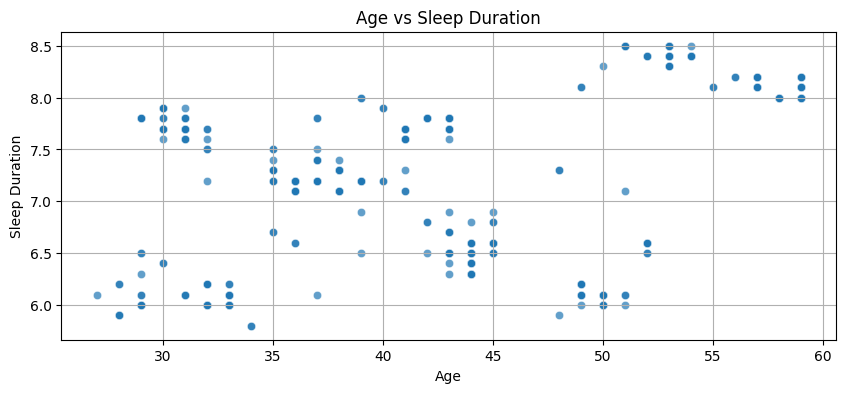

In [12]:
plt.figure(figsize=(10, 4))
sns.scatterplot(data=data, x='Age', y='Sleep Duration', alpha=0.7)
plt.title('Age vs Sleep Duration')
plt.xlabel('Age')
plt.ylabel('Sleep Duration')
plt.grid(True)
plt.show()

Fiziksel aktivite seviyesi arttıkça uyku süresi az miktarda artıyor gibi gözüküyor.

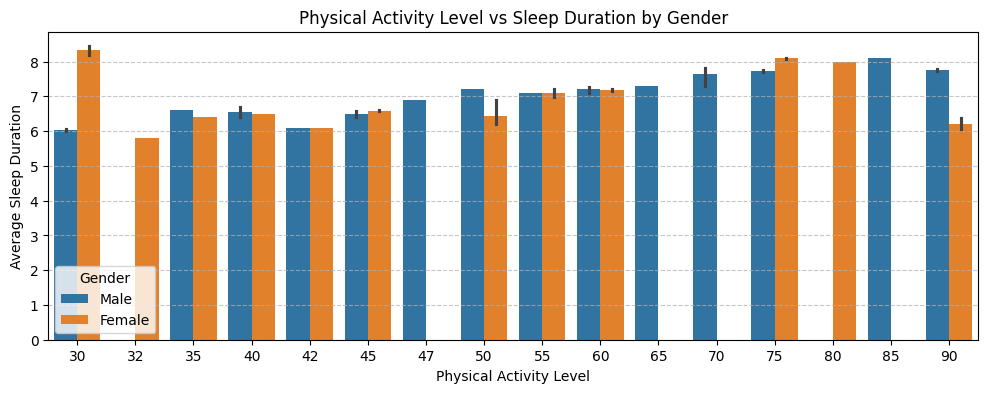

In [13]:
plt.figure(figsize=(12, 4))
sns.barplot(data=data, x='Physical Activity Level', y='Sleep Duration', hue='Gender')
plt.title('Physical Activity Level vs Sleep Duration by Gender')
plt.xlabel('Physical Activity Level')
plt.ylabel('Average Sleep Duration')
plt.legend(title='Gender')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Kadınlar yaşlandıkça daha çok uyku sorunu çekiyor gibi gözüküyor. Erkekler ise daha genç yaşlarda bu sorunlara sahip.

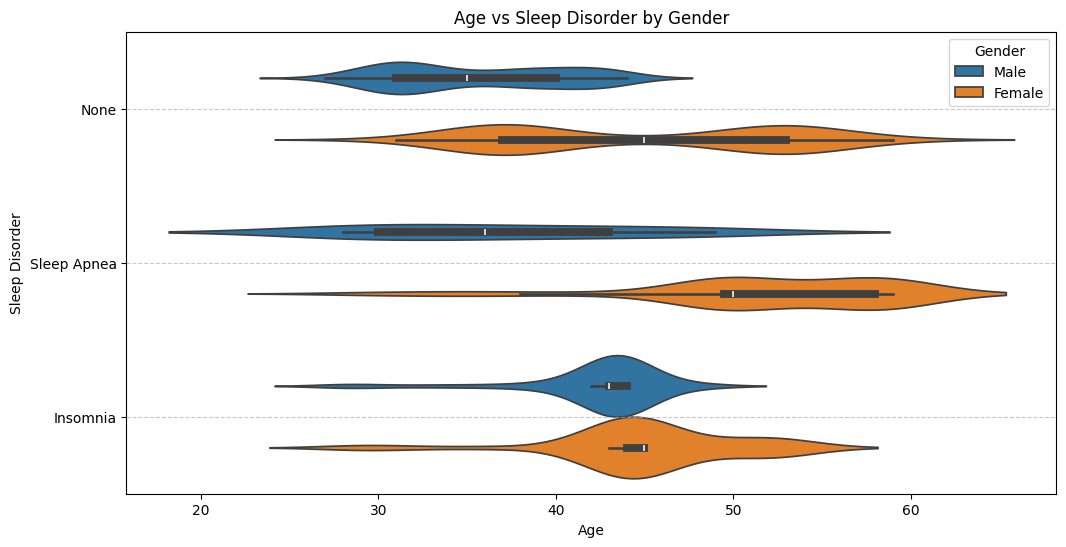

In [14]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=data, x='Age', hue='Gender', y=data['Sleep Disorder'])
plt.title('Age vs Sleep Disorder by Gender')
plt.xlabel('Age')
plt.ylabel('Sleep Disorder')
plt.legend(title='Gender')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Bu grafiğe göre en çok uyku problemi çeken meslekler; hemşirelik, öğretmenler ve pazarlamacılar gibi gözüküyor. Özellik seçimine daha geçmedik fakat meslek sütunu, uyku problemi sınıflandırması modeli için önemli bir özellik olacaktır.

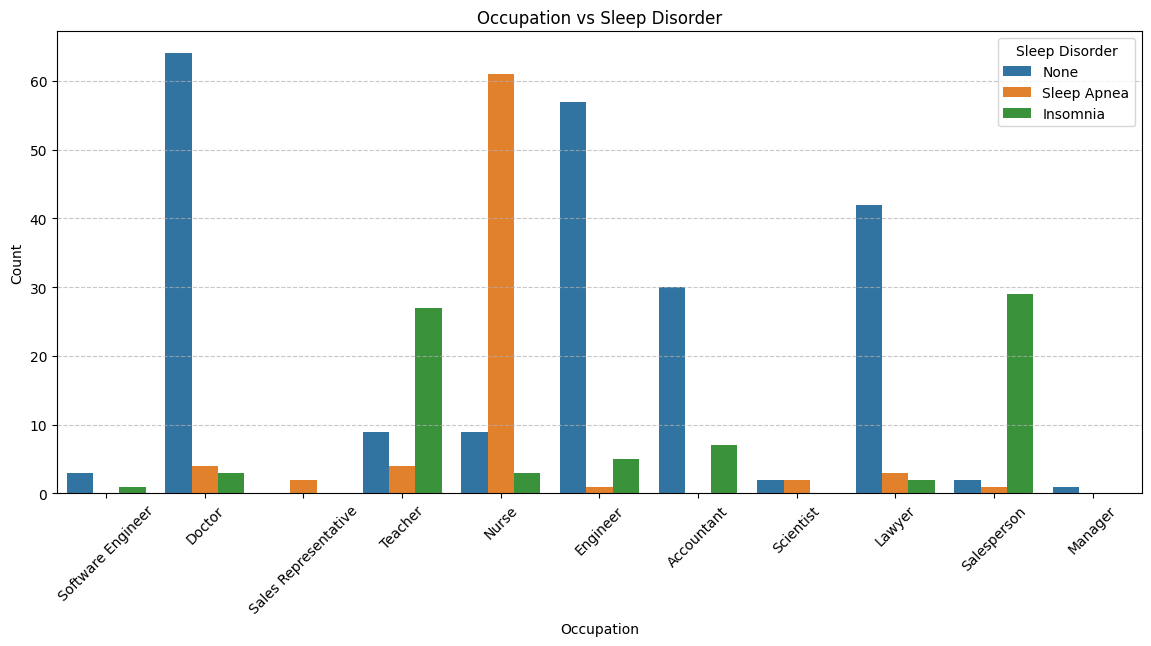

In [15]:
plt.figure(figsize=(14, 6))
sns.countplot(data=data, x='Occupation', hue='Sleep Disorder')
plt.title('Occupation vs Sleep Disorder')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.legend(title='Sleep Disorder')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Bu grafikten çıkarımımız mühendis ve doktor gibi mesleklerin kaliteli uyku çektikleri kanısında. En kötü uykuya sahip meslekler; satış temsilcisi ve bilim insanı gibi gözüküyor.

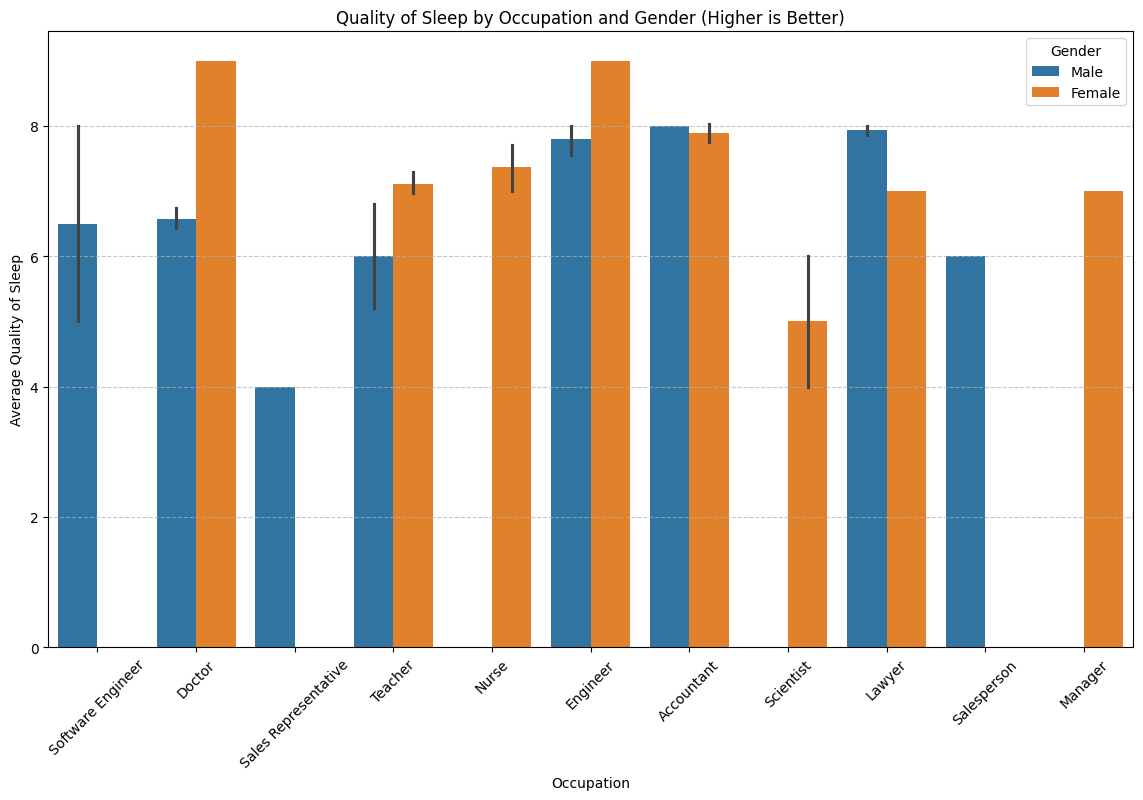

In [16]:
plt.figure(figsize=(14, 8))
sns.barplot(data=data, x='Occupation', y='Quality of Sleep', hue='Gender')
plt.title('Quality of Sleep by Occupation and Gender (Higher is Better)')
plt.xlabel('Occupation')
plt.ylabel('Average Quality of Sleep')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Veri setinde 2 kere tekrar eden bir BMI kategorisi varmış. En iyisi normal weight ile normal olan kategorileri birleştirip tek bir normal kategorisi elde edelim.

Ayrıca obez olup da uyku problemi çekmeyen biri yok gibi gözüküyor. Kilo, uyku sorunlarını tetikleyen bir etken gibi gözüküyor.

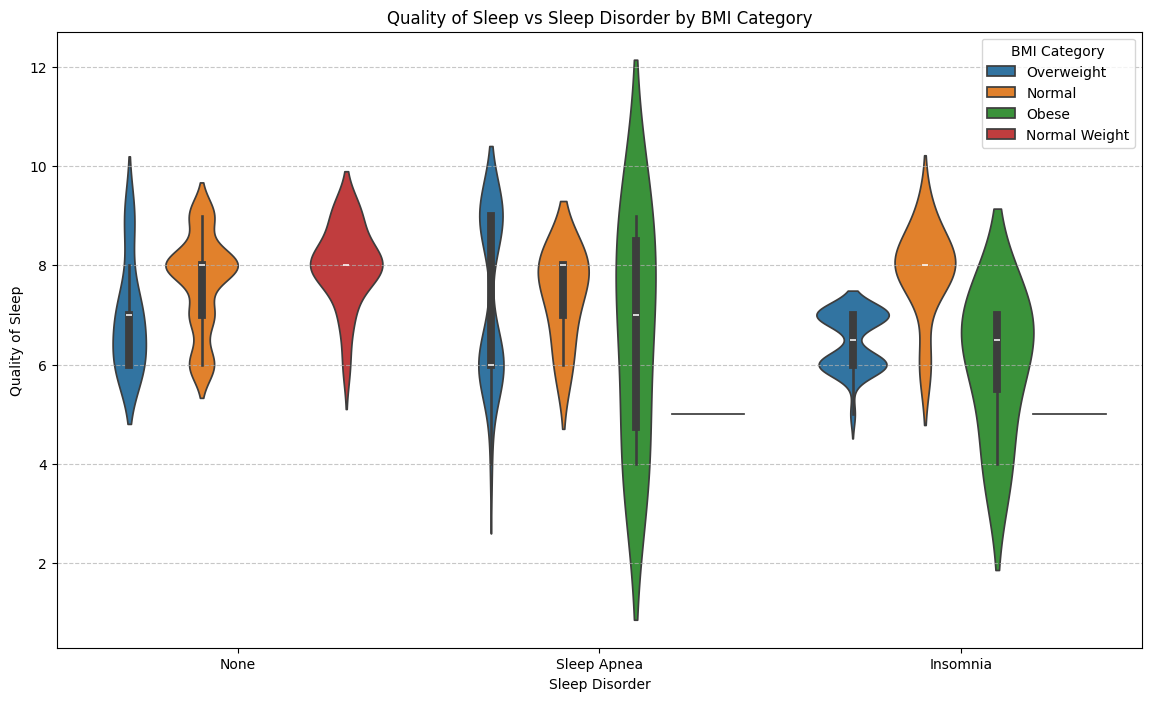

In [17]:
plt.figure(figsize=(14, 8))
sns.violinplot(data=data, x='Sleep Disorder', y='Quality of Sleep', hue='BMI Category')
plt.title('Quality of Sleep vs Sleep Disorder by BMI Category')
plt.xlabel('Sleep Disorder')
plt.ylabel('Quality of Sleep')
plt.legend(title='BMI Category')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [18]:
data['BMI Category'] = data['BMI Category'].replace('Normal Weight', 'Normal')


Stres seviyesi arttıkça uyku kalitesinin düştüğünü gözlemleyebiliyoruz.

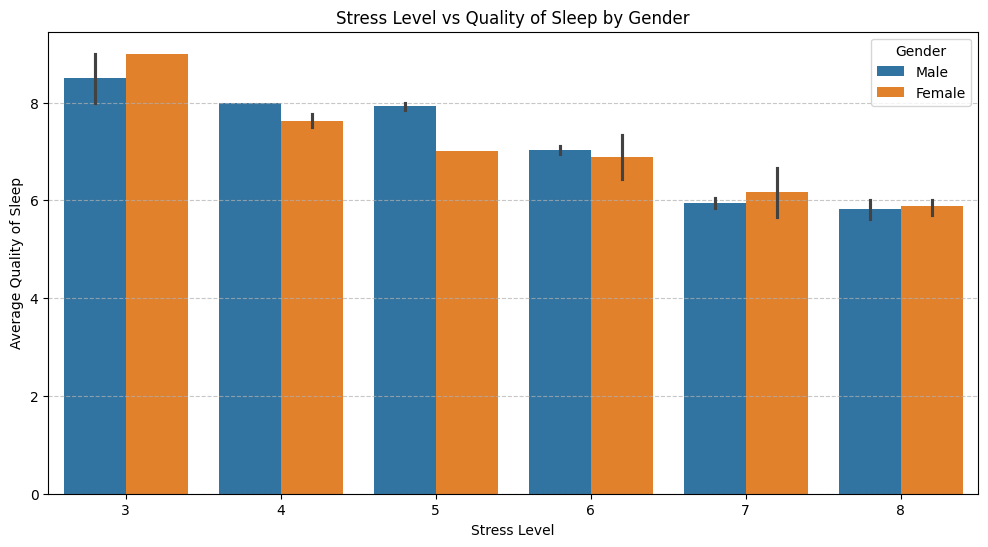

In [19]:
plt.figure(figsize=(12, 6))
sns.barplot(data=data, x='Stress Level', y='Quality of Sleep', hue='Gender')
plt.title('Stress Level vs Quality of Sleep by Gender')
plt.xlabel('Stress Level')
plt.ylabel('Average Quality of Sleep')
plt.legend(title='Gender')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Stres seviyesi arttıkça uyku problemleri ortaya çıkıyor.

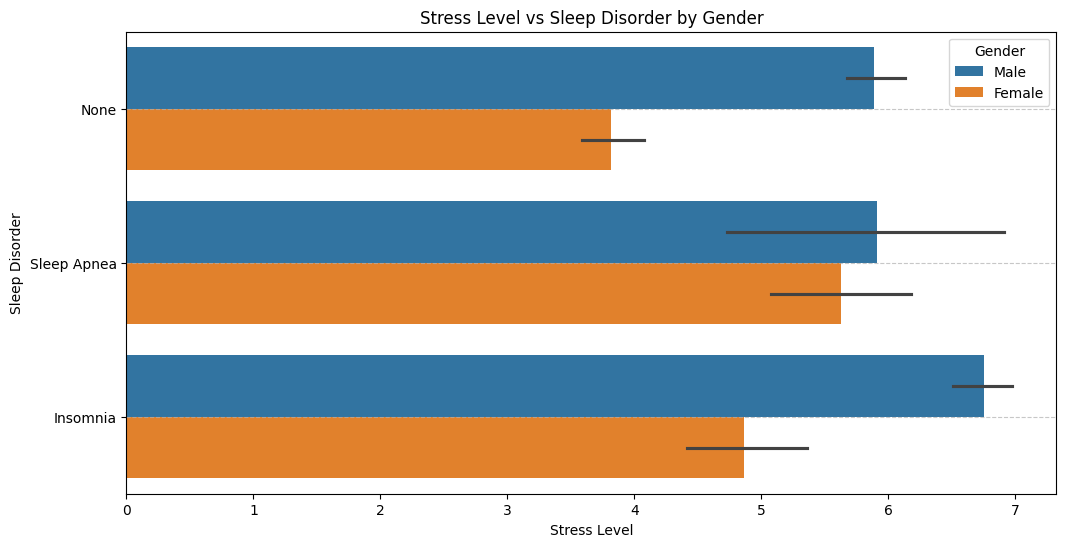

In [20]:
plt.figure(figsize=(12, 6))
sns.barplot(data=data, x='Stress Level', y='Sleep Disorder', hue='Gender')
plt.title('Stress Level vs Sleep Disorder by Gender')
plt.xlabel('Stress Level')
plt.ylabel('Sleep Disorder')
plt.legend(title='Gender')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Veri Önişleme

Veri setindeki sütunlarda sadece heart_rate sütununda minimal bir aykırı değer miktarı var. Bu aykırı değerler şimdilik durabilir, özellik seçimi esnasında eğer heart rate önem teşkil ediyorsa bu aykırı değerleri çıkartabiliriz.

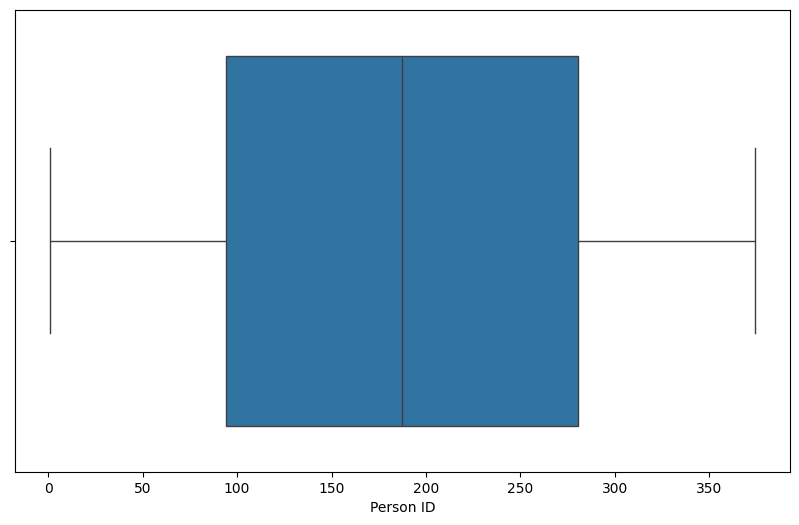

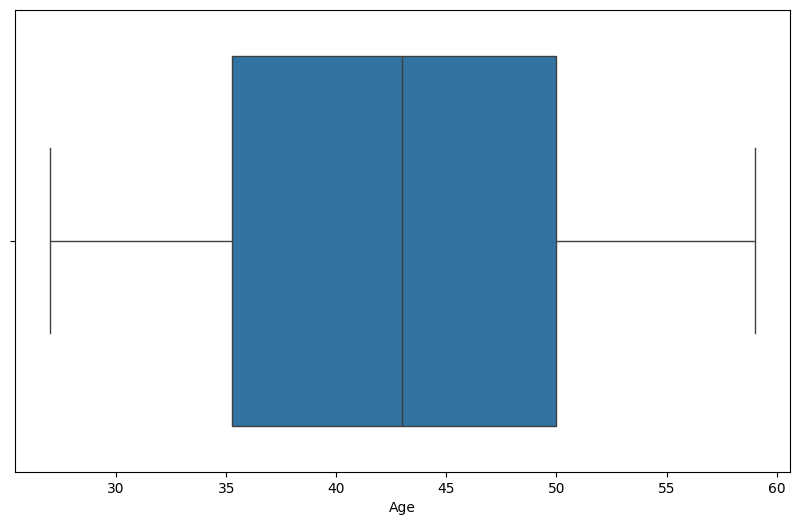

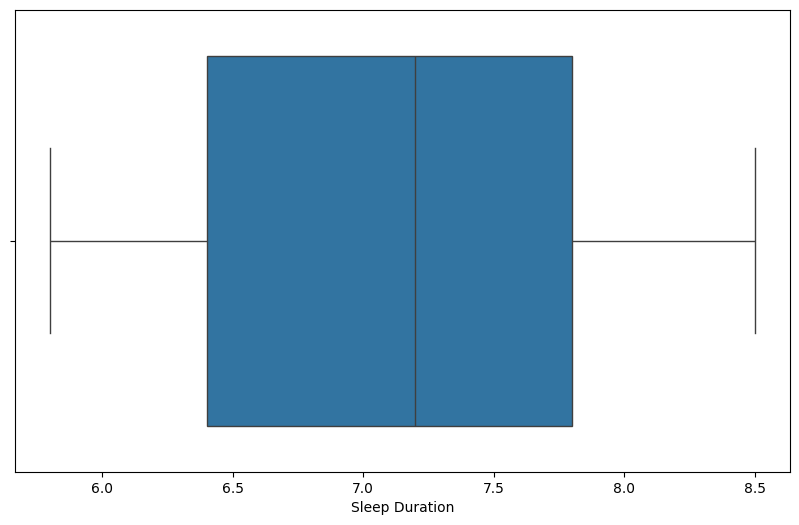

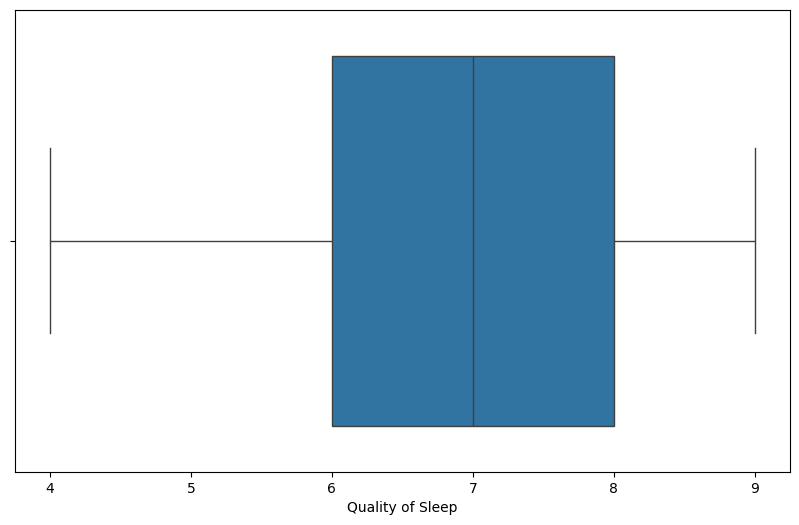

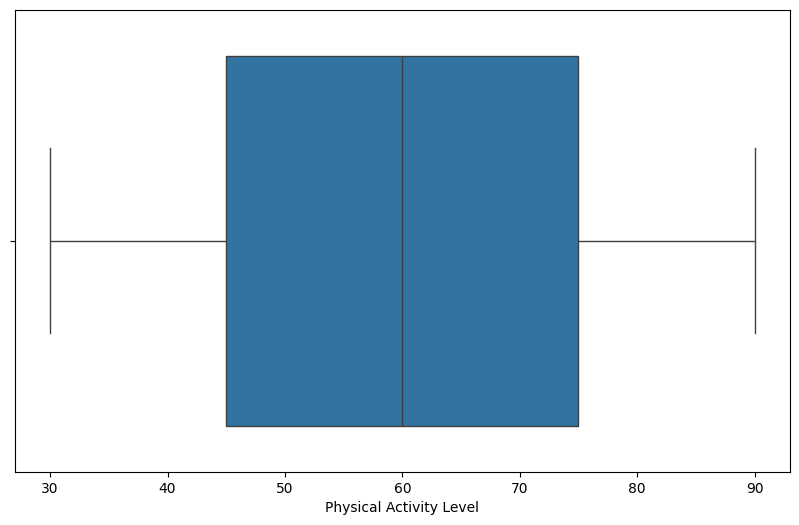

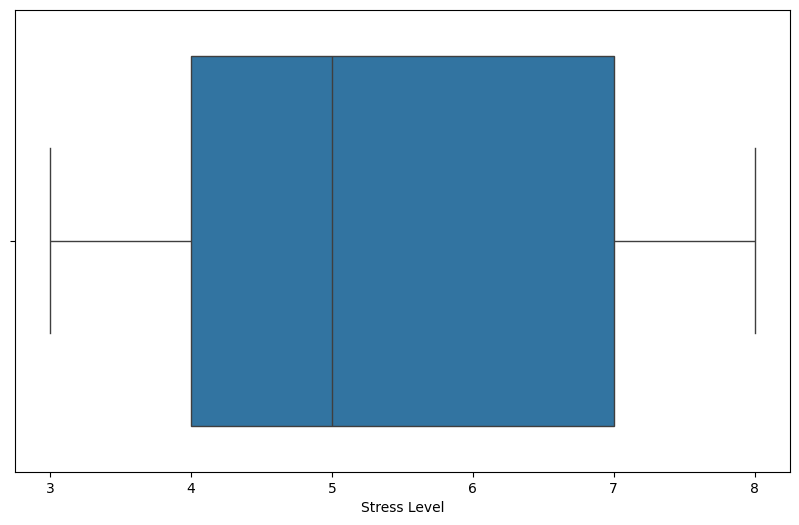

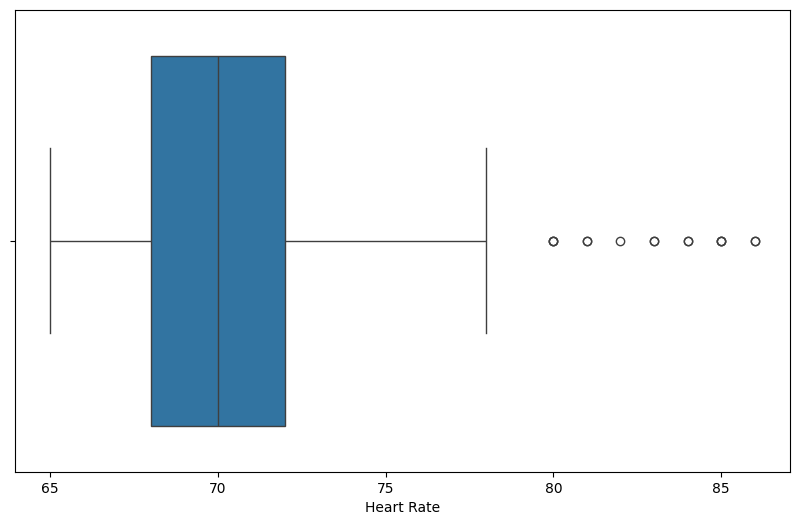

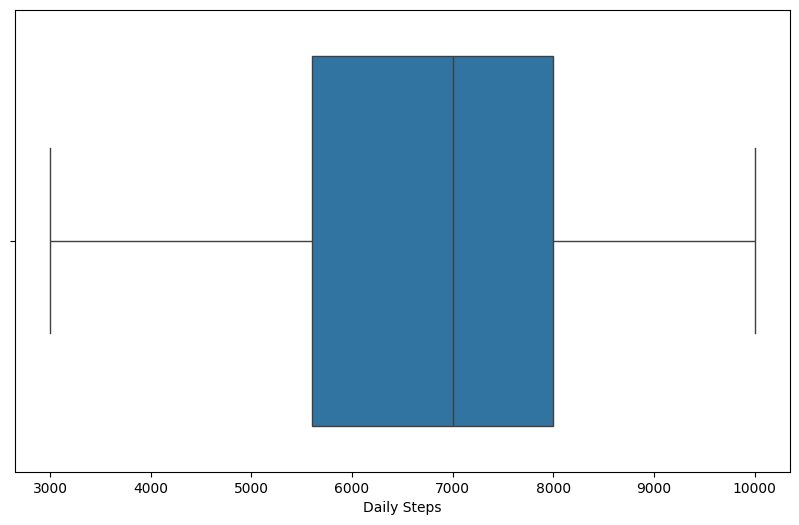

In [21]:
sayisal = data.select_dtypes(include=['int64', 'float64'])
for sutun in sayisal:
    plt.figure(figsize=(10,6))
    sns.boxplot(data=sayisal, x=sayisal[sutun])
    plt.show()


# Özellik Seçimi

Neden Özellik Seçimi Yapıyoruz?

Modelin daha hızlı ve verimli çalışmasını sağlamak

Gereksiz, etkisiz veya fazla korelasyonlu değişkenleri elemek

Aşırı öğrenme (overfitting) riskini azaltmak

Daha az ama daha anlamlı veriyle yüksek doğruluk elde etmek

In [22]:
from sklearn.preprocessing import LabelEncoder

# BMI Category - sıralı manuel encoding
data['BMI Category'] = data['BMI Category'].map({
    'Normal': 0,
    'Overweight': 1,
    'Obese': 2
})

# Sleep Disorder (hedef) - sıralı manuel encoding
data['Sleep Disorder'] = data['Sleep Disorder'].map({
    'None': 0,
    'Insomnia': 1,
    'Sleep Apnea': 2
})

# Gender - 0/1'e çevir 
data['Gender'] = data['Gender'].map({'Male': 1, 'Female': 0})

# Occupation - frequency encoding

occupation_freq = data['Occupation'].value_counts(normalize=True)
data['Occupation'] = data['Occupation'].map(occupation_freq)

# Blood Pressure - sayısal parçalama
data[['Systolic', 'Diastolic']] = data['Blood Pressure'].str.split('/', expand=True).astype(int)
data.drop(columns='Blood Pressure', inplace=True)

# X ve y ayrımı
X = data.drop(columns=['Sleep Disorder', 'Person ID'])
y = data['Sleep Disorder']


In [23]:
from sklearn.preprocessing import StandardScaler

# 1. Sayısal sütunları seç
numerical_cols = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level',
                  'Stress Level', 'Heart Rate', 'Daily Steps', 'Systolic', 'Diastolic']

# 2. Sayısal olmayan (kategorik veya encode edilmiş) sütunları belirle
categorical_cols = [col for col in X.columns if col not in numerical_cols]

# 3. Sayısal olanlara scaler uygula
scaler = StandardScaler()
X_scaled_numerical = pd.DataFrame(
    scaler.fit_transform(X[numerical_cols]),
    columns=numerical_cols,
    index=X.index
)

# 4. Kategorik olanları olduğu gibi al
X_categorical = X[categorical_cols]

# 5. İkisini birleştir
X_scaled = pd.concat([X_scaled_numerical, X_categorical], axis=1)


## SelectKBest

Her özelliğin hedef değişkenle olan ilişkisini istatistiksel olarak test eder.

En yüksek F-score değerine sahip K adet özelliği seçer.

Özellikle hedef değişken sürekli veya sıralıysa etkilidir.

In [24]:
from sklearn.feature_selection import SelectKBest, f_classif

def select_k_best_with_scores(X_scaled, y, k=5):
    selector = SelectKBest(score_func=f_classif, k=k)
    selector.fit(X_scaled, y)

    scores = selector.scores_

    feature_scores = pd.DataFrame({
        'Feature': X_scaled.columns,
        'Score': scores,
    }).sort_values(by='Score', ascending=False)

    return feature_scores


| Sıra | Özellik                     | Skor   | Açıklama                                                                                 |
| ---- | --------------------------- | ------ | ---------------------------------------------------------------------------------------- |
| 1    | **BMI Category**            | 299.81 | Uyku bozukluğu ile en güçlü ilişkili. Fazla kilolu/obez bireylerde daha sık görülebilir. |
| 2    | **Diastolic**               | 268.10 | Alt tansiyon. Uyku kalitesi ve bozukluklarıyla doğrudan ilişkili.                        |
| 3    | **Systolic**                | 214.58 | Üst tansiyon. Yüksek tansiyon uyku apnesiyle bağlantılı olabilir.                        |
| 4    | **Age**                     | 58.41  | Yaş arttıkça uyku problemleri artabilir. Güçlü ilişki var.                               |
| 5    | **Occupation**              | 53.77  | İş türü (gece/masa başı/fiziksel iş) uyku düzenini etkileyebilir.                        |
| 6    | **Physical Activity Level** | 44.15  | Fiziksel aktivite düşükse uyku kalitesi genellikle düşer.                                |
| 7    | **Heart Rate**              | 32.95  | Dinlenme nabzı, stres ve uyku kalitesiyle ilgili olabilir.                               |
| 8    | **Sleep Duration**          | 31.91  | Uyku süresi doğrudan bozukluklarla bağlantılı.                                           |
| 9    | **Gender**                  | 31.51  | Cinsiyet bazlı farklılıklar var (örneğin kadınlarda insomnia daha yaygın).               |
| 10   | **Quality of Sleep**        | 27.60  | Uyku bozukluğu tanısı genellikle düşük uyku kalitesiyle birlikte gelir.                  |
| 11   | **Daily Steps**             | 24.78  | Etkili ama ilk 10’a girememiş. Günlük hareketlilik bir faktör olabilir.                  |
| 12   | **Stress Level**            | 6.60   | En düşük ilişki. Belki de verideki ölçüm tipi/formatı doğru ilişkiyi yansıtamıyor.       |


In [25]:
kbest_result = select_k_best_with_scores(X_scaled, y, k=5)
print(kbest_result)


                    Feature       Score
11             BMI Category  299.810555
8                 Diastolic  268.097906
7                  Systolic  214.585414
0                       Age   58.408963
10               Occupation   53.774459
3   Physical Activity Level   44.150579
5                Heart Rate   32.948639
1            Sleep Duration   31.913468
9                    Gender   31.510655
2          Quality of Sleep   27.600604
6               Daily Steps   24.776923
4              Stress Level    6.603565


Kbest özellik seçimi sonrasında X_kbest adlı yeni bir özellik seti oluşturduk.


In [26]:
# SelectKBest ile seçilen sütunları al
selected_features_kbest = ['Age','Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Gender']

# Bu özellik setini ayrı bir X tanımıyla sakla
X_kbest = X_scaled[selected_features_kbest]


## RFE Yöntemi

Belirli bir tahmin modeli (örneğin, Logistic Regression) üzerinden çalışır.

Önemsiz bulduğu özellikleri yinelemeli olarak kaldırır.

En iyi performansı veren alt özellik kümesini arar.

Aşamalı olarak özellik çıkarımı yaptığı için güçlüdür.

In [27]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import pandas as pd

def rfe_feature_selection_with_table(X, y, n=5):
    # 1. Model tanımla
    model = LogisticRegression(max_iter=1000)

    # 2. RFE ile seçici oluştur
    selector = RFE(estimator=model, n_features_to_select=n)
    selector.fit(X, y)

    # 3. 'Selected' sütunu olmadan sadece sıralama içeren tablo
    ranking_df = pd.DataFrame({
        'Feature': X.columns,
        'Ranking': selector.ranking_
    }).sort_values(by='Ranking')

    # 4. Seçilen özellik isimleri
    selected_features = X.columns[selector.support_].tolist()

    # 5. Yeni özellik seti oluştur
    X_rfe = X[selected_features]

    return ranking_df, X_rfe


x_rfe setini elde ettik

In [28]:
rfe_table = rfe_feature_selection_with_table(X_scaled, y, n=5)

X_rfe = X_scaled[['Age', 'Gender', 'Quality of Sleep', 'Heart Rate', 'Sleep Duration']]

# Tabloyu yazdır
print(rfe_table)

(                    Feature  Ranking
2          Quality of Sleep        1
5                Heart Rate        1
9                    Gender        1
8                 Diastolic        1
11             BMI Category        1
0                       Age        2
1            Sleep Duration        3
6               Daily Steps        4
7                  Systolic        5
3   Physical Activity Level        6
10               Occupation        7
4              Stress Level        8,      Quality of Sleep  Heart Rate  Diastolic  Gender  BMI Category
0           -1.098280    1.654719  -0.268102       1             1
1           -1.098280    1.170474  -0.755640       1             0
2           -1.098280    1.170474  -0.755640       1             0
3           -2.771424    3.591698   0.869486       1             2
4           -2.771424    3.591698   0.869486       1             2
..                ...         ...        ...     ...           ...
369          1.411435   -0.524383   1.682049    

##  Mutual Information

Özelliklerin hedef değişkenle olan bilgi kazancı ilişkisini ölçer.

Özellikler ve hedef değişken arasındaki bağımlılığı yakalar.

Doğrusal olmayan ilişkileri bile tespit edebilir.

In [29]:
from sklearn.feature_selection import mutual_info_classif

def mi_feature_selection_with_table(X, y, top_n=5):
    # MI skorlarını hesapla
    mi_scores = mutual_info_classif(X, y, random_state=42)
    
    # DataFrame'e çevir ve sırala
    mi_df = pd.DataFrame({
        'Feature': X.columns,
        'MI Score': mi_scores
    }).sort_values(by='MI Score', ascending=False)
    
    # İlk N özelliği seç
    selected_features = mi_df.head(top_n)['Feature'].tolist()
    X_mi = X[selected_features]

    return mi_df, X_mi



| Sıra | Özellik                      | MI Score | Açıklama                                                                                                  |
| ---- | ---------------------------- | -------- | --------------------------------------------------------------------------------------------------------- |
| 1    | **Systolic (üst tansiyon)**  | 0.4989   | Uyku bozukluklarını güçlü şekilde açıklıyor. Hipertansiyon ile uyku apnesi arasında sıkı ilişki olabilir. |
| 2    | **Diastolic (alt tansiyon)** | 0.4916   | Üst tansiyonla birlikte kalp-damar yükü ve uyku problemleri bağlantılı olabilir.                          |
| 3    | **Daily Steps**              | 0.4912   | Fiziksel hareketlilik arttıkça uyku bozukluğu riski düşebilir. İlginç ve önemli bir bulgu.                |
| 4    | **Sleep Duration**           | 0.4700   | Uyku süresi doğrudan uyku bozukluğu türü ile ilişkili olabilir.                                           |
| 5    | **Occupation**               | 0.4618   | Gece vardiyası veya stresli işlerin uyku düzenini bozduğu bilinir.                                        |
| 6    | **Age**                      | 0.4548   | Yaşlandıkça uyku kalitesi ve süresi düşebilir, bozukluk riski artar.                                      |
| 7    | **BMI Category**             | 0.3965   | Obezite uyku apnesi riskini artırır. Bu skor da bunu doğruluyor.                                          |
| 8    | **Physical Activity Level**  | 0.3675   | Daha az aktif olan bireylerde bozukluk daha yaygın olabilir.                                              |
| 9    | **Heart Rate**               | 0.3283   | Dinlenme nabzı, stres seviyesi ve uyku kalitesine bağlıdır.                                               |
| 10   | **Stress Level**             | 0.2991   | Yine makul katkı yapan bir özellik; daha az ama var.                                                      |
| 11   | **Quality of Sleep**         | 0.2038   | MI yöntemine göre daha az katkı sağlıyor — biraz şaşırtıcı olabilir.                                      |
| 12   | **Gender**                   | 0.0281   | Kadın/erkek farkı bu modelde anlamlı bir ayrım yaratmamış.                                                |


X_mi özellik setini oluşturduk

In [30]:
mi_table = mi_feature_selection_with_table(X_scaled, y, top_n=5)

X_mi = X_scaled[['Age', 'BMI Category', 'Sleep Duration', 'Daily Steps','Physical Activity Level']]

# Sonuçları yazdır
print(mi_table)


(                    Feature  MI Score
7                  Systolic  0.498863
8                 Diastolic  0.491640
6               Daily Steps  0.491215
1            Sleep Duration  0.470002
10               Occupation  0.461800
0                       Age  0.454784
11             BMI Category  0.396546
3   Physical Activity Level  0.367500
5                Heart Rate  0.328283
4              Stress Level  0.299113
2          Quality of Sleep  0.203868
9                    Gender  0.028129,      Systolic  Diastolic  Daily Steps  Sleep Duration  Occupation
0   -0.330002  -0.268102    -1.619584       -1.298887    0.010695
1   -0.459239  -0.755640     1.970077       -1.173036    0.189840
2   -0.459239  -0.755640     1.970077       -1.173036    0.189840
3    1.479309   0.869486    -2.362273       -1.550588    0.005348
4    1.479309   0.869486    -2.362273       -1.550588    0.005348
..        ...        ...          ...             ...         ...
369  1.479309   1.682049     0.113356     

# Model Eğitimi

Neden Birden Fazla Model Kullandık?

Farklı algoritmalar farklı veri yapılarında daha iyi sonuç verebilir.

Modelleri karşılaştırarak en yüksek başarıyı göstereni tespit etmek istedik.

Gerçek dünyada veri çeşitliliği fazla olduğu için çoklu test önemli.

| Sıra | Model Adı                        | Tür / Yaklaşım                     | Açıklama                                                                                                                                                 |
| ---- | -------------------------------- | ---------------------------------- | -------------------------------------------------------------------------------------------------------------------------------------------------------- |
| 1    | **Logistic Regression**          | Lineer / Parametrik                | Basit, hızlı ve yorumlaması kolay bir modeldir. Doğrusal sınırlar üzerinden çalışır. Özellikle temel sınıflandırma problemleri için uygundur.            |
| 2    | **Decision Tree**                | Karar Ağacı / Kural Bazlı          | Veriyi if-else şeklinde dallara ayırarak sınıflandırır. Kolay yorumlanabilir. Ancak aşırı öğrenmeye yatkındır.                                           |
| 3    | **Random Forest**                | Ensemble / Bagging                 | Birden fazla karar ağacının ortalamasını alarak tahmin yapar. Genellikle yüksek doğruluk sağlar. Overfitting riskini azaltır.                            |
| 4    | **Support Vector Machine (SVM)** | Margin-Maximizing / Kernel Tabanlı | Karmaşık sınıflandırma problemleri için güçlüdür. Sınıflar arası en iyi ayrım çizgisini (hiperdüzlem) bulmaya çalışır. Küçük veri kümelerinde etkilidir. |


In [32]:
import joblib
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Özellik setlerini tanımla (örnek: dışarıdan verildiği varsayılıyor)
X_sets = {'SelectKBest': X_kbest, 'RFE': X_rfe, 'Mutual Information': X_mi}

# Model yapılandırmaları
classifiers = {
    'Logistic Regression': LogisticRegression(C=0.05, max_iter=25, penalty='l2', random_state=42),
    'Decision Tree': DecisionTreeClassifier(max_depth=3, min_samples_split=25, min_samples_leaf=50, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=35, max_depth=2, min_samples_split=30, min_samples_leaf=45, random_state=42),
    'SVM': SVC(C=0.05, kernel='rbf', gamma='scale', probability=True)
}

# Değerlendirme + kayıt
def evaluate_and_save_models(X_sets, y, classifiers, test_size=0.2, random_state=42):
    results = []

    for set_name, X in X_sets.items():
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

        for model_name, model in classifiers.items():
            model.fit(X_train, y_train)

            # Tahminler
            y_train_pred = model.predict(X_train)
            y_test_pred = model.predict(X_test)

            # 🎯 Modeli kaydet (.pkl)
            filename = f"model_{model_name.replace(' ', '')}_{set_name.replace(' ', '')}.pkl"
            joblib.dump({'model': model, 'features': list(X.columns)}, filename)

            # 🔎 Metrikleri hesapla
            for split, y_true, y_pred in [('Train', y_train, y_train_pred), ('Test', y_test, y_test_pred)]:
                results.append({
                    'Feature Set': set_name,
                    'Model': model_name,
                    'Data Split': split,
                    'Saved As': filename if split == 'Test' else '',  # sadece test için kayıt ismi göster
                    'Accuracy': accuracy_score(y_true, y_pred),
                    'Precision': precision_score(y_true, y_pred, average='weighted', zero_division=0),
                    'Recall': recall_score(y_true, y_pred, average='weighted'),
                    'F1-Score': f1_score(y_true, y_pred, average='weighted')
                })

    return pd.DataFrame(results)

# Fonksiyonu çalıştır
results_df = evaluate_and_save_models(X_sets, y, classifiers)
print("\n--- Model Performans ve Kayıt Bilgileri (Train & Test) ---")
print(results_df)



--- Model Performans ve Kayıt Bilgileri (Train & Test) ---
           Feature Set                Model Data Split  \
0          SelectKBest  Logistic Regression      Train   
1          SelectKBest  Logistic Regression       Test   
2          SelectKBest        Decision Tree      Train   
3          SelectKBest        Decision Tree       Test   
4          SelectKBest        Random Forest      Train   
5          SelectKBest        Random Forest       Test   
6          SelectKBest                  SVM      Train   
7          SelectKBest                  SVM       Test   
8                  RFE  Logistic Regression      Train   
9                  RFE  Logistic Regression       Test   
10                 RFE        Decision Tree      Train   
11                 RFE        Decision Tree       Test   
12                 RFE        Random Forest      Train   
13                 RFE        Random Forest       Test   
14                 RFE                  SVM      Train   
15          

| Model \ Özellik Seti    | En Stabil                          | En Düşük Hata                        | En Çok Hata                            |
| ----------------------- | ---------------------------------- | ------------------------------------ | -------------------------------------- |
| **Logistic Regression** | RFE ile çok tutarlı sonuçlar verdi | RFE ile en yüksek başarı (0.906 acc) | MI ile test verisinde düşüş var        |
| **Decision Tree**       | SelectKBest ve RFE ile dengeli     | SelectKBest/RFE ile test acc: 0.853  | MI ile test acc: 0.706 (en düşük)      |
| **Random Forest**       | RFE ile görece stabil              | RFE ile test acc: 0.853              | SelectKBest/MI ile düşük precision     |
| **SVM**                 | MI ve RFE ile güçlü performans     | RFE ile test acc: 0.813, yüksek F1   | SelectKBest ile daha dengesiz sonuçlar |



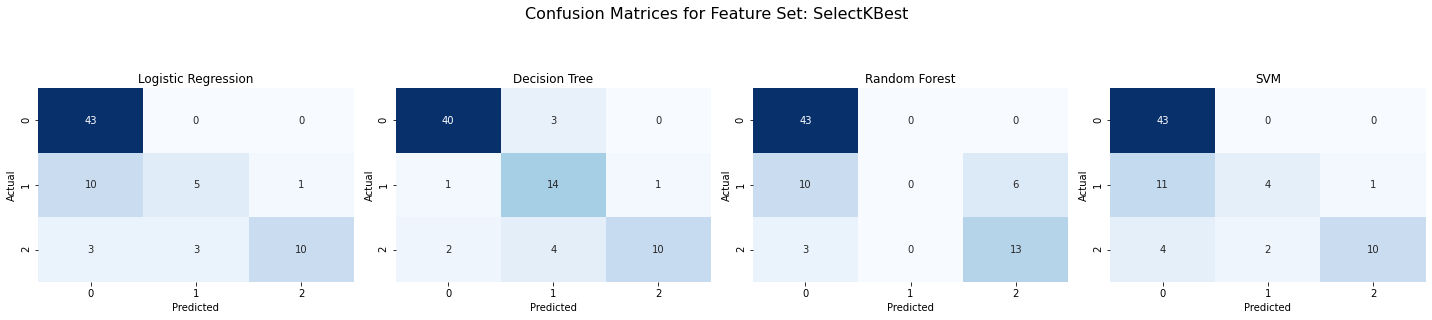

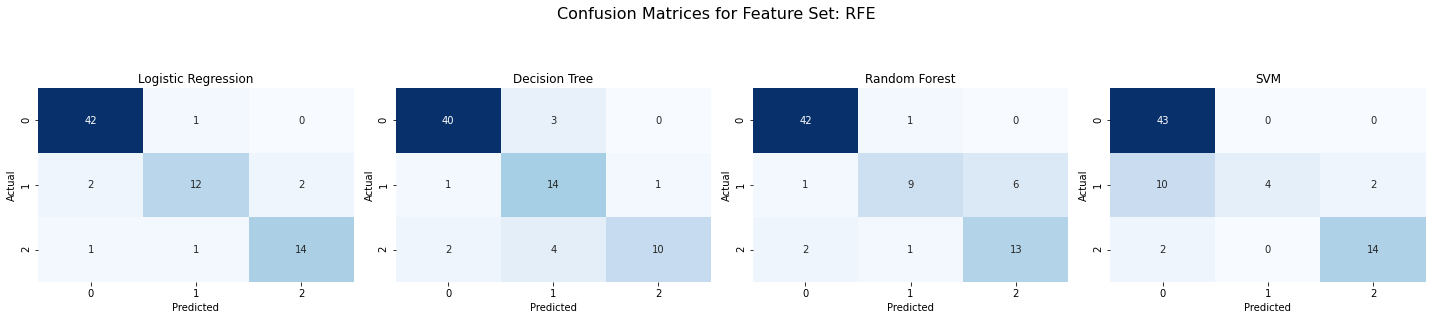

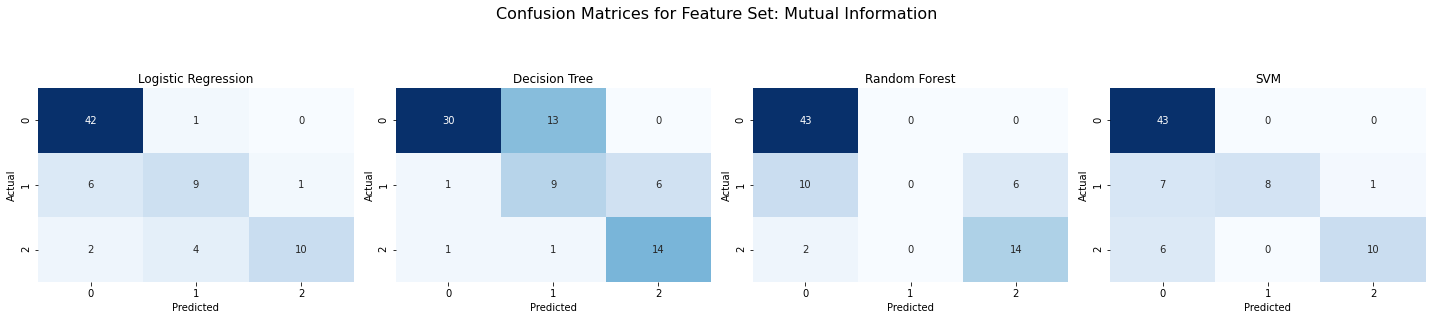

In [145]:
# Confusion Matrix için gerekli importlar
from sklearn.metrics import confusion_matrix
# 5️⃣ Confusion Matrix çizimi
for set_name, X in X_sets.items():
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    plt.figure(figsize=(20, 4))
    plt.suptitle(f'Confusion Matrices for Feature Set: {set_name}', fontsize=16, y=1.1)
    
    for idx, (model_name, model) in enumerate(classifiers.items(), 1):
        plt.subplot(1, 4, idx)
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        cm = confusion_matrix(y_test, y_pred, labels=[0, 1, 2])  # sınıf etiketleri sabitleniyor
        
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
        plt.title(model_name)
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
    
    plt.tight_layout()
    plt.show()